In [4]:
!pip install autoviz
!pip install -U feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 764.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: bokeh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from feature_engine.encoding import RareLabelEncoder # For encoding rare labels; we could have also used sklearn encoder with infrequent categories
from feature_engine.outliers import Winsorizer
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [3]:
df= pd.read_csv('/content/liver_cirrhosis.csv', header=0)
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.duplicated().sum())


(25000, 19)
Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
15361


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [6]:
df['Age']= (df['Age']/365.242374).round(2)
df['N_Days']= (df['N_Days']/365.242374).round(2)
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,6.08,C,Placebo,50.65,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,3.37,C,Placebo,54.00,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,11.46,C,Placebo,32.41,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,5.72,D,Placebo,45.09,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,5.76,D,Placebo,59.41,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [7]:
nom_var = ['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
ord_var = ['Stage']
num_var = ['N_Days', 'Age', 'Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','Tryglicerides','Platelets','Prothrombin','SGOT']

In [8]:
# Numeric Pipeline
num_pipe  = Pipeline(steps = [("out", Winsorizer(capping_method='quantiles', tail='both', fold=.06))])
# Nominal Pipeline
nom_pipe = Pipeline(steps = [("ohe", OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore', categories='auto'))])
# Ordinal Pipeline
ord_pipe = Pipeline(steps = [("ord", OrdinalEncoder())])

preprocessor = ColumnTransformer(transformers = [("nom", nom_pipe, nom_var),
                                                 ("ord", ord_pipe, ord_var),
                                                 ("num", num_pipe, num_var)], remainder = "passthrough")
preprocessor.set_output(transform = "pandas")
preprocessor.fit(df)
df_pro = preprocessor.transform(df)
df_pro.columns

Index(['nom__Status_CL', 'nom__Status_D', 'nom__Drug_Placebo', 'nom__Sex_M',
       'nom__Ascites_Y', 'nom__Hepatomegaly_Y', 'nom__Spiders_Y',
       'nom__Edema_S', 'nom__Edema_Y', 'ord__Stage', 'num__N_Days', 'num__Age',
       'num__Bilirubin', 'num__Cholesterol', 'num__Albumin', 'num__Copper',
       'num__Alk_Phos', 'num__Tryglicerides', 'num__Platelets',
       'num__Prothrombin', 'num__SGOT'],
      dtype='object')

In [11]:
df_pro.head()

,nom__Status_CL,nom__Status_D,nom__Drug_Placebo,nom__Sex_M,nom__Ascites_Y,nom__Hepatomegaly_Y,nom__Spiders_Y,nom__Edema_S,nom__Edema_Y,ord__Stage,num__N_Days,num__Age,num__Bilirubin,num__Cholesterol,num__Albumin,num__Copper,num__Alk_Phos,num__Tryglicerides,num__Platelets,num__Prothrombin,num__SGOT
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.08,50.65,0.5,210.0,4.03,221.0,645.0,59.0,256.0,9.9,57.35
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,3.37,54.00,0.5,219.0,3.93,22.0,663.0,75.0,220.0,10.8,57.35
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.77,34.60,0.5,320.0,3.54,51.0,1243.0,80.0,225.0,10.0,122.45
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.72,45.09,0.7,255.0,3.74,23.0,1024.0,59.0,151.0,10.2,77.50
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.76,59.41,1.9,486.0,3.54,74.0,1052.0,109.0,151.0,11.5,108.50


In [21]:
X = df_pro.drop(columns=['ord__Stage'])  # Assuming 'nom__target_1' is the target variable
y = df_pro['ord__Stage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [5,10,15,20,25],
    'min_samples_split': [2,4,6, 8]
}


In [22]:
# Perform Grid Search
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Best Parameters: {'max_depth': 25, 'min_samples_split': 4, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       617
         1.0       0.83      0.85      0.84       640
         2.0       0.90      0.92      0.91       671

    accuracy                           0.87      1928
   macro avg       0.87      0.87      0.87      1928
weighted avg       0.87      0.87      0.87      1928



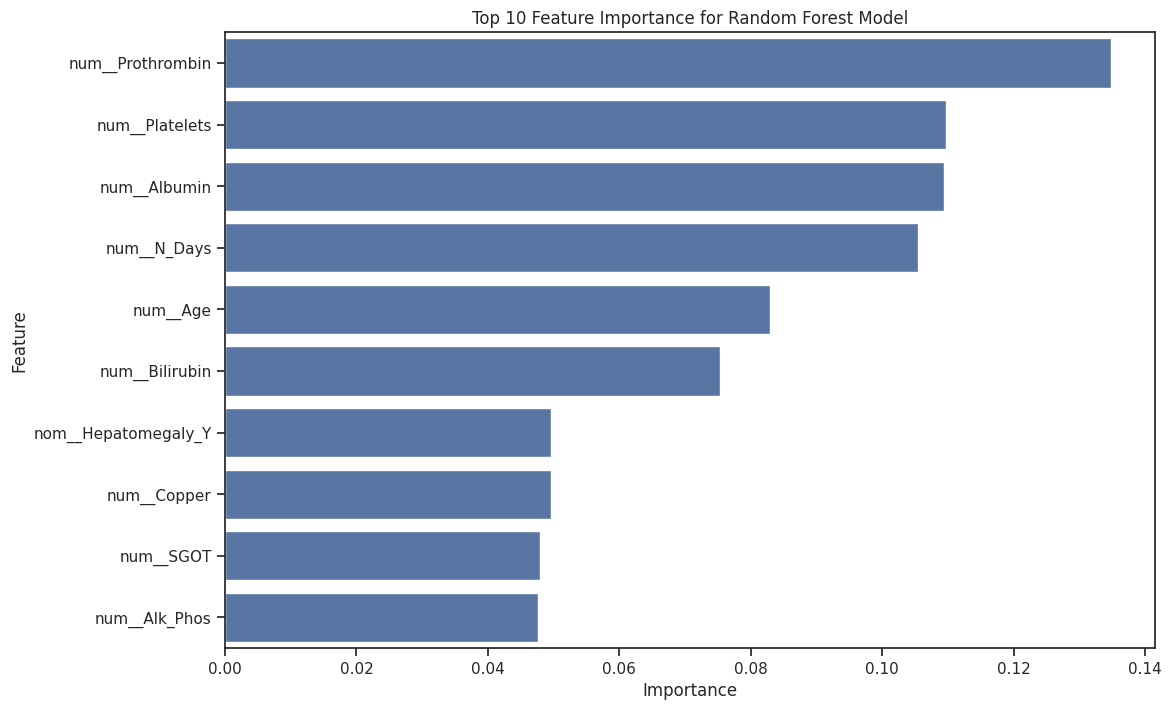

In [23]:
feature_importances = rf_best_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importance_df.head(10)

# Plot top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()